# Imports and data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from ESN.ESN import *
from Helper.utils import nrmse
import os
from MackeyGlass.MackeyGlassGenerator import run
import time
import seaborn as sns

sns.set_style('whitegrid')
sns.despine()
sns.set_context('notebook', font_scale=1.5)

data = np.array(run(15100)).reshape(-1, 1)
split = 14100
X_train = np.array(data[:split-1])
y_train = np.array(data[1:split])
X_valid = np.array(data[split-1:-1])
y_valid = np.array(data[split:])
data_mean = np.mean(data)

DONE


# View best LCESN grid-search results

In [3]:
res_files = os.listdir('Results/LCESN')
#print(res_files)

results = pkl.load(open('Results/LCESN/Tue-Mar-20-16:54:59-2018.p'))
results_list = results.items()
print(len(results_list))
results_list = sorted(results_list, key=lambda x: np.mean(x[1]))

for k, v in results_list[:3]:
    print(k)
    print(v)

512

        num_res: 10
res_sizes:[200 200 200 200 200 200 200 200 200 200]
echo_params:[0.84999999999999998, 0.81111111111111112, 0.77222222222222214, 0.73333333333333328, 0.69444444444444442, 0.65555555555555556, 0.6166666666666667, 0.57777777777777772, 0.53888888888888886, 0.5]
input_scales:[0.20000000000000001, 0.20000000000000001, 0.20000000000000001, 0.20000000000000001, 0.20000000000000001, 0.20000000000000001, 0.20000000000000001, 0.20000000000000001, 0.20000000000000001, 0.20000000000000001]
spectral_scales:[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
        regulariser: 0.000100
[0.017733589389141727, 0.0054939505444227066, 0.086991286698266362]

        num_res: 10
res_sizes:[200 200 200 200 200 200 200 200 200 200]
echo_params:[0.84999999999999998, 0.81111111111111112, 0.77222222222222214, 0.73333333333333328, 0.69444444444444442, 0.65555555555555556, 0.6166666666666667, 0.57777777777777772, 0.53888888888888886, 0.5]
input_scales:[0.20000000000000001, 0.288888888888

# Run LCESN experiments

In [ ]:
def run_tests_LCESN(n_runs=10):
    errors = []
    for _ in range(n_runs):
        start_time = time.time()

        model = LCESN(
            1, 1, num_reservoirs=10, 
            reservoir_sizes = np.linspace(200, 200, 10).astype(int),
            echo_params=np.linspace(0.85, 0.5, 10),
            regulariser=1e-4
        )
        model.initialize_input_weights(
            scales=np.linspace(0.2, 0.2, 10)
        )
        model.initialize_reservoir_weights(
            spectral_scales=np.linspace(1.0, 1.0, 10)
        )

        model.train(X_train, y_train)

        y_pred = []
        u_n = np.array(X_valid[0])
        for _ in range(len(data[split:])):
            u_n = np.array(model.forward(u_n))
            y_pred.append(np.array(u_n))

        print('Took %f seconds.' % (time.time() - start_time))

        y_pred = np.array(y_pred).squeeze()

        error = nrmse(y_valid, y_pred, data_mean)
        print('NRMSE: %f' % error)
        errors.append(error)

    raw_input('Press enter to save these results.')
    to_save = dict()
    to_save[model.info()] = errors

    title = 'Results/LCESN/GOOD'+time.asctime()[3:-5].replace(' ', '-')+'.p'
    pkl.dump(to_save, open(title, 'wb'))
    
    return errors
    
errors = run_tests_LCESN(n_runs=200)

Took 7.643866 seconds.
NRMSE: 0.358300
Took 7.268543 seconds.
NRMSE: 0.400768
Took 7.309626 seconds.
NRMSE: 0.063154
Took 7.323505 seconds.
NRMSE: 0.416938
Took 7.343439 seconds.
NRMSE: 0.381499
Took 7.225382 seconds.
NRMSE: 0.356747
Took 7.376762 seconds.
NRMSE: 0.515456
Took 7.256449 seconds.
NRMSE: 0.421984
Took 7.774756 seconds.
NRMSE: 0.392883
Took 7.633557 seconds.
NRMSE: 0.118889
Took 7.403895 seconds.
NRMSE: 0.169708
Took 7.834214 seconds.
NRMSE: 0.404264
Took 7.340061 seconds.
NRMSE: 0.058936
Took 7.594994 seconds.
NRMSE: 0.214992
Took 7.365945 seconds.
NRMSE: 0.334970
Took 7.643528 seconds.
NRMSE: 0.269413
Took 7.368150 seconds.
NRMSE: 0.435241
Took 8.357127 seconds.
NRMSE: 0.142996
Took 8.140905 seconds.
NRMSE: 0.348386
Took 8.569356 seconds.
NRMSE: 0.146727
Took 9.265036 seconds.
NRMSE: 0.333119
Took 9.048994 seconds.
NRMSE: 0.040936
Took 8.468074 seconds.
NRMSE: 0.197282
Took 7.475109 seconds.
NRMSE: 0.059468
Took 7.357555 seconds.
NRMSE: 0.410938
Took 7.353013 seconds.
NR

# View best EESN grid-search results

In [36]:
res_files = os.listdir('Results/EESN')
#print(res_files)

results = pkl.load(open('Results/EESN/Tue-Mar-20-15:20:56-2018.p'))
results_list = results.items()
print(len(results_list))
results_list = sorted(results_list, key=lambda x: np.mean(x[1]))

for k, v in results_list[:3]:
    print(k)
    print(v)

71

        num_res: 10
res_sizes:[ 50  72  94 116 138 161 183 205 227 250]
echo_params:[0.84999999999999998, 0.81111111111111112, 0.77222222222222214, 0.73333333333333328, 0.69444444444444442, 0.65555555555555556, 0.6166666666666667, 0.57777777777777772, 0.53888888888888886, 0.5]
input_scales:[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
spectral_scales:[0.90000000000000002, 0.93888888888888888, 0.97777777777777786, 1.0166666666666666, 1.0555555555555556, 1.0944444444444446, 1.1333333333333333, 1.1722222222222223, 1.2111111111111112, 1.25]
        regulariser: 0.010000
[0.63539017911218421, 0.78345164021348834, 0.6404769490345803]

        num_res: 10
res_sizes:[ 10  64 118 173 227 282 336 391 445 500]
echo_params:[0.84999999999999998, 0.81111111111111112, 0.77222222222222214, 0.73333333333333328, 0.69444444444444442, 0.65555555555555556, 0.6166666666666667, 0.57777777777777772, 0.53888888888888886, 0.5]
input_scales:[1.0, 0.91111111111111109, 0.82222222222222219, 0.7333333333333

# Run EESN experiments

In [6]:
def run_tests_EESN():
    errors = []
    for _ in range(10):
        start_time = time.time()

        model = EESN(
            1, 1, num_reservoirs=10, 
            reservoir_sizes = np.linspace(100, 200, 10).astype(int),
            echo_params=np.linspace(0.85, 0.5, 10),
            regulariser=1e-3
        )
        model.initialize_input_weights(
            scales=np.linspace(0.5, 0.5, 10)
        )
        model.initialize_reservoir_weights(
            spectral_scales=np.linspace(0.9, 1.25, 10)
        )

        model.train(X_train, y_train)

        y_pred = []
        u_n = np.array(X_valid[0])
        for _ in range(len(data[split:])):
            u_n = np.array(model.forward(u_n))
            y_pred.append(u_n)

        print('Took %f seconds.' % (time.time() - start_time))

        y_pred = np.array(y_pred).squeeze()

        error = nrmse(y_valid, y_pred, data_mean)
        print('NRMSE: %f' % error)
        errors.append(error)

    raw_input('Press enter to save these results.')
    to_save = dict()
    to_save[model.info()] = errors

    title = 'Results/EESN/GOOD'+time.asctime()[3:-5].replace(' ', '-')+'.p'
    pkl.dump(to_save, open(title, 'wb'))
    
run_tests_EESN()

Took 4.802785 seconds.
NRMSE: 0.705208
Took 4.818423 seconds.
NRMSE: 0.940372
Took 5.118763 seconds.
NRMSE: 0.801098


KeyboardInterrupt: 

# View best ESN grid-search results

In [37]:
res_files = os.listdir('Results/ESN')
#print(res_files)

results = pkl.load(open('Results/ESN/Tue-Mar-20-15:57:14-2018.p'))
results_list = results.items()
print(len(results_list))
results_list = sorted(results_list, key=lambda x: np.mean(x[1]))

for k, v in results_list[:3]:
    print(k)
    print(v)

32
r_size:1250
e_prm:0.200000
i_scl:0.200000
s_scl:0.200000
sp:0.100000
reg:0.010000
[0.95888583264557692, 0.9592464574783266, 0.95540733020735513]
r_size:1000
e_prm:0.200000
i_scl:0.377778
s_scl:0.200000
sp:0.100000
reg:0.010000
[0.95941941785065632, 0.95709995284711602, 0.95720503948829871]
r_size:1250
e_prm:0.200000
i_scl:0.288889
s_scl:0.200000
sp:0.100000
reg:0.010000
[0.95730550602108622, 0.95866973580931059, 0.96281364879994424]


# Run ESN experiments

In [ ]:
def run_tests_ESN(n_runs=10):
    errors = []
    for _ in range(n_runs):
        start_time = time.time()

        model = ESN(
            1, 1, reservoir_size=1000,
            echo_param=0.85,
            regulariser=1e-5
        )
        model.initialize_input_weights(scale=1.0)
        model.initialize_reservoir_weights(spectral_scale=1.25)

        model.train(np.array(X_train), np.array(y_train))

        y_pred = []
        #u_n = np.array(data[split-1])
        u_n = np.array(X_valid[0])
        for _ in range(len(data[split:])):
            u_n = np.array(model.forward(u_n))
            y_pred.append(u_n)

        print('Took %f seconds.' % (time.time() - start_time))

        y_pred = np.array(y_pred).squeeze()

        error = nrmse(y_valid, y_pred, data_mean)
        print('NRMSE: %f' % error)
        errors.append(error)

    raw_input('Press enter to save these results.')
    to_save = dict()
    to_save[model.info()] = errors

    title = 'Results/ESN/GOOD'+time.asctime()[3:-5].replace(' ', '-')+'.p'
    pkl.dump(to_save, open(title, 'wb'))
    
    return errors
    
errors = run_tests_ESN(n_runs=200)

Took 16.212575 seconds.
NRMSE: 0.840387
Took 17.441843 seconds.
NRMSE: 0.647152
Took 17.760438 seconds.
NRMSE: 0.595354
Took 17.089349 seconds.
NRMSE: 0.489003
Took 16.760837 seconds.
NRMSE: 0.544919
Took 19.389011 seconds.
NRMSE: 0.547104
Took 17.345181 seconds.
NRMSE: 0.588932
Took 21.963151 seconds.
NRMSE: 0.790456
Took 19.255091 seconds.
NRMSE: 1.189646
Took 17.435097 seconds.
NRMSE: 0.807733
Took 20.111074 seconds.
NRMSE: 1.130693
Took 17.674215 seconds.
NRMSE: 0.712196
Took 17.857388 seconds.
NRMSE: 0.616011
Took 19.640861 seconds.
NRMSE: 0.553091
Took 18.678755 seconds.
NRMSE: 0.615948
Took 18.138462 seconds.
NRMSE: 0.494552
Took 17.830559 seconds.
NRMSE: 0.690154
Took 16.654469 seconds.
NRMSE: 0.531486
Took 18.312947 seconds.
NRMSE: 1.040803
Took 18.361089 seconds.
NRMSE: 0.451453
Took 16.354491 seconds.
NRMSE: 0.601235
Took 16.373163 seconds.
NRMSE: 0.691486
Took 17.548131 seconds.
NRMSE: 0.586984
Took 16.046133 seconds.
NRMSE: 1.253983
Took 15.808967 seconds.
NRMSE: 1.469608


# Create nice histograms here

n_failures: 12


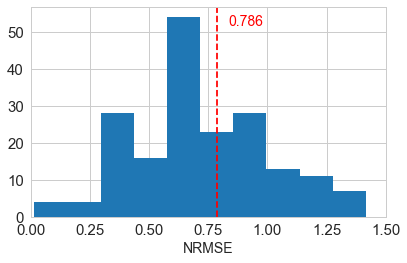

In [16]:
errors = pkl.load(open('Results/ESN/GOOD-Mar-20-18:12:29.p', 'rb'))
errors = errors.values()[0]
errors_hist = np.array(errors)
errors_hist = errors_hist[np.where(errors_hist <= 1.5)]
mean_error = np.mean(errors_hist)
n_failures = len(errors) - len(errors_hist)
print('n_failures: %d' % n_failures)

hist, bins = np.histogram(errors_hist)
bin_width = bins[1] - bins[0]

f, ax = plt.subplots(figsize=(6, 4))
ax.bar(bins[:-1], hist, width=bin_width)
ymin, ymax = ax.get_ylim()
ax.plot([mean_error]*2, [ymin, ymax], linestyle='--', color='red')
ax.text(
    mean_error+0.05, ymax-5, '%.3f' % mean_error, color='red', fontsize=14
)

ax.set_ylim([ymin, ymax])
ax.set_xlim([0, 1.5])
ax.set_xlabel('NRMSE', fontsize=14)

plt.tight_layout()
#f.savefig('EXAMPLE_ERROR_HIST.pdf')
plt.show()